In [1]:
from skimage import io,filters,util,img_as_uint,color
from skimage.transform import hough_line, hough_line_peaks
from skimage.morphology import disk, dilation, erosion, remove_small_objects
from skimage.measure import regionprops

import matplotlib.pyplot as plt

import numpy as np

from scipy import ndimage as ndi

In [2]:
def plot_number(mask_line_path, image_rgb_path):
    mask_line = io.imread(mask_line_path)
    selem = disk(7)
    Grid_Image = dilation(mask_line, selem)

    Grid_Segment = np.logical_not(Grid_Image) 
    Grid_Segment_Refine = erosion(Grid_Segment, disk(3))

    list_bbox_area = []
    Labelled_Plot_Img_o, num_features_o = ndi.measurements.label(Grid_Segment_Refine)
    for region in regionprops(Labelled_Plot_Img_o):
        list_bbox_area.append(region.area)

    re_area = np.max(list_bbox_area)*0.5

    Grid_Segment_Refine = remove_small_objects(Grid_Segment_Refine, re_area)

    Labelled_Plot_Img, num_features = ndi.measurements.label(Grid_Segment_Refine)

    list_cencoor_x = []
    list_cencoor_y = []
    for region in regionprops(Labelled_Plot_Img):
        minr, minc, maxr, maxc = region.bbox
        list_cencoor_x.append(region.centroid[1])
        list_cencoor_y.append(region.centroid[0])
        
    img_rgb = io.imread(image_rgb_path)
    plt.figure(figsize=(10,10))
    x = list_cencoor_x
    y = list_cencoor_y
    i = 1
    for xy in zip(x, y):
        plt.annotate("%s" % i,xy=xy,xytext=(-10, -4), textcoords='offset points',color='yellow',fontsize=16,)
        i+=1
    plt.imshow(((img_rgb[:,:,0:3] * color.gray2rgb(img_as_uint(Grid_Segment_Refine)*255)).astype(np.uint8)))

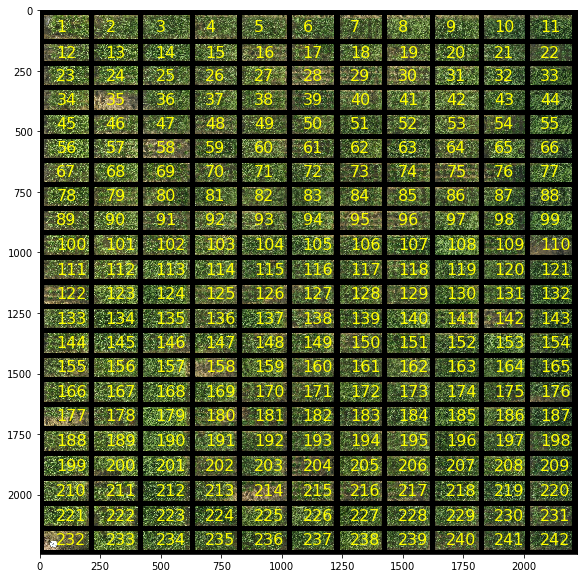

In [3]:
mask_line_path = r"D:\hainan_lingshui\mask_RIL1big_ppt.png"
image_rgb_path = r"D:\hainan_lingshui\RGB\20200227\200227_big.png"
plot_number(mask_line_path, image_rgb_path)